In [31]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch

In [3]:
import os

In [4]:
from PIL import Image

In [2]:
help(Dataset)

Help on class Dataset in module torch.utils.data.dataset:

class Dataset(typing.Generic)
 |  An abstract class representing a :class:`Dataset`.
 |
 |  All datasets that represent a map from keys to data samples should subclass
 |  it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
 |  data sample for a given key. Subclasses could also optionally overwrite
 |  :meth:`__len__`, which is expected to return the size of the dataset by many
 |  :class:`~torch.utils.data.Sampler` implementations and the default options
 |  of :class:`~torch.utils.data.DataLoader`. Subclasses could also
 |  optionally implement :meth:`__getitems__`, for speedup batched samples
 |  loading. This method accepts list of indices of samples of batch and returns
 |  list of samples.
 |
 |  .. note::
 |    :class:`~torch.utils.data.DataLoader` by default constructs an index
 |    sampler that yields integral indices.  To make it work with a map-style
 |    dataset with non-integral indices

In [4]:
Dataset??

Init signature: Dataset()
Source:        
class Dataset(Generic[_T_co]):
    r"""An abstract class representing a :class:`Dataset`.

    All datasets that represent a map from keys to data samples should subclass
    it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
    data sample for a given key. Subclasses could also optionally overwrite
    :meth:`__len__`, which is expected to return the size of the dataset by many
    :class:`~torch.utils.data.Sampler` implementations and the default options
    of :class:`~torch.utils.data.DataLoader`. Subclasses could also
    optionally implement :meth:`__getitems__`, for speedup batched samples
    loading. This method accepts list of indices of samples of batch and returns
    list of samples.

    .. note::
      :class:`~torch.utils.data.DataLoader` by default constructs an index
      sampler that yields integral indices.  To make it work with a map-style
      dataset with non-integral indices/keys, a custom 

In [35]:
class MyData(Dataset):
    def __init__(self, root_dir, label_dir):
        self.root_dir = root_dir
        self.label_dir = label_dir
        self.path = os.path.join(self.root_dir, self.label_dir)
        self.image_names = os.listdir(self.path)
        


    def __getitem__(self, index):
        imag_name = self.image_names[index]
        imag_path = os.path.join(self.path, imag_name)
        imag = Image.open(imag_path)
        label = self.label_dir
        return imag, label
    
    def __len__(self):
        return len(self.image_names)
    


In [36]:
root_dir = "Dataset\\train"
ants_label_dir = "ants"
ants_dataset = MyData(root_dir, ants_label_dir)
ants_dataset.path


'Dataset\\train\\ants'

In [37]:
img1, label1 = ants_dataset[0]# 等价于img1, label1 = ants_dataset.__getitem__(0)
img1, label1

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x512>, 'ants')

In [38]:
bees_label_dir = "bees"
bees_dataset = MyData(root_dir, bees_label_dir)
dataset = ants_dataset + bees_dataset 

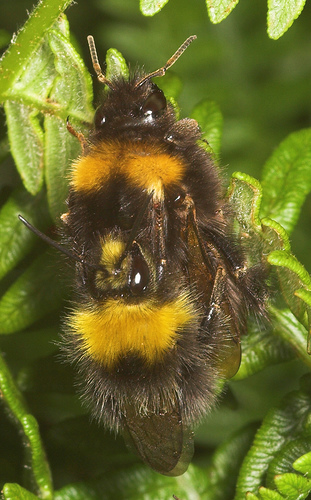

In [39]:
img,lab = dataset.__getitem__(147)
img

In [40]:
def collate_fn(batch):
    # 定义统一的预处理：调整大小 + 转 tensor
    transform = transforms.Compose([
        transforms.Resize((224, 224)), transforms.ToTensor()])  # 统一为 224x224（可改为你需要的尺寸）
        
    
    images = []
    labels = []
    for img, label in batch:
        img = img.convert('RGB')  # 确保是 RGB（避免 RGBA 或 L 模式问题）
        img = transform(img)      # 转为统一尺寸的 tensor
        images.append(img)
        labels.append(label)
    
    images = torch.stack(images, dim=0)  # [B, C, H, W]
    return images, labels


In [41]:
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

for data in dataloader:
    img_data, lab_data = data
    print(img_data.shape)
    print(lab_data)

torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Size([4, 3, 224, 224])
['ants', 'ants', 'ants', 'ants']
torch.Si